In [ ]:
!pip install opendatasets

import opendatasets as od
od.download("https://www.kaggle.com/datasets/sehriyarmemmedli/open-closed-eyes-dataset?utm_source=chatgpt.com ")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahmedkarem21
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sehriyarmemmedli/open-closed-eyes-dataset


100%|██████████| 1.44G/1.44G [00:12<00:00, 128MB/s]


In [ ]:
#Download Dataset

url = "https://www.kaggle.com/datasets/sehriyarmemmedli/open-closed-eyes-dataset?utm_source=chatgpt.com"
od.download(url)
data_root = "/content/data"

print("Dataset downloaded successfully!")

Skipping, found downloaded files in "./open-closed-eyes-dataset" (use force=True to force download)
Dataset downloaded successfully!


In [ ]:
import shutil
import os

source_path = '/content/open-closed-eyes-dataset/val'
destination_path = '/content/'

try:
    shutil.move(source_path, destination_path)
    print(f"Successfully moved '{source_path}' to '{destination_path}'")
    print(f"Contents of {destination_path} after move:")
    for item in os.listdir(destination_path):
        print(f"- {item}")
except Exception as e:
    print(f"Error moving directory: {e}")

Successfully moved '/content/open-closed-eyes-dataset/val' to '/content/'
Contents of /content/ after move:
- .config
- open-closed-eyes-dataset
- val
- sample_data


In [ ]:
import os

def rename_images_in_directory(directory_path, prefix):
    if not os.path.isdir(directory_path):
        print(f"Error: Directory '{directory_path}' does not exist.")
        return

    print(f"Renaming images in '{directory_path}' with prefix '{prefix}'...")
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')
    renamed_count = 0
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(image_extensions):
            old_path = os.path.join(directory_path, filename)
            # Check if the file is already prefixed to avoid double prefixing if run multiple times
            if not filename.startswith(prefix + '_'):
                new_filename = f"{prefix}_{filename}"
                new_path = os.path.join(directory_path, new_filename)
                try:
                    os.rename(old_path, new_path)
                    renamed_count += 1
                except Exception as e:
                    print(f"Error renaming '{old_path}' to '{new_path}': {e}")
            else:
                print(f"Skipping '{filename}', already prefixed.")
    print(f"Successfully renamed {renamed_count} images in '{directory_path}'.")

# Define the directories
closed_dir = '/content/train/Closed'
open_dir = '/content/train/Open'

# Rename images in the 'Closed' directory
rename_images_in_directory(closed_dir, 'closed')

# Rename images in the 'Open' directory
rename_images_in_directory(open_dir, 'open')

print("Image renaming process completed.")


Renaming images in '/content/train/Closed' with prefix 'closed'...
Successfully renamed 6665 images in '/content/train/Closed'.
Renaming images in '/content/train/Open' with prefix 'open'...
Successfully renamed 21296 images in '/content/train/Open'.
Image renaming process completed.


In [ ]:
import os

def delete_images_in_directory(directory_path):
    if not os.path.isdir(directory_path):
        print(f"Error: Directory '{directory_path}' does not exist.")
        return

    print(f"Deleting image files in '{directory_path}'...")
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')
    deleted_count = 0
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(image_extensions):
            file_path = os.path.join(directory_path, filename)
            try:
                os.remove(file_path)
                deleted_count += 1
            except Exception as e:
                print(f"Error deleting '{file_path}': {e}")
    print(f"Successfully deleted {deleted_count} image files from '{directory_path}'.")

delete_images_in_directory('/content/train/dataset')


Deleting image files in '/content/train/dataset'...
Successfully deleted 0 image files from '/content/train/dataset'.


In [ ]:
import os
import shutil

# Define source and destination directories
source_dir_closed = '/content/train/Closed'
source_dir_open = '/content/train/Open'
destination_dir = '/content/train/dataset'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# List of common image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')

def copy_images(source_path, dest_path):
    """Copies all image files from source_path to dest_path."""
    print(f"Copying images from {source_path}...")
    for filename in os.listdir(source_path):
        if filename.lower().endswith(image_extensions):
            source_file = os.path.join(source_path, filename)
            destination_file = os.path.join(dest_path, filename)
            try:
                shutil.copy2(source_file, destination_file)
            except Exception as e:
                print(f"Error copying {source_file}: {e}")

# Copy images from 'Closed' directory
copy_images(source_dir_closed, destination_dir)

# Copy images from 'Open' directory
copy_images(source_dir_open, destination_dir)

print(f"All image files have been copied to {destination_dir}")
print(f"Number of files in {destination_dir}: {len(os.listdir(destination_dir))}")


Copying images from /content/train/Closed...
Copying images from /content/train/Open...
All image files have been copied to /content/train/dataset
Number of files in /content/train/dataset: 27961


In [ ]:
import os

# Image extensions (reusing from previous definitions or ensuring it's available)
# If image_extensions is not in kernel state, uncomment and define it:
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')

# Directories to count images in, as provided by the user
target_directories = [
    '/content/train/Closed',
    '/content/train/Open',
    '/content/train/dataset'
]

print("--- Counting Images train Directory ---")

for directory in target_directories:
    if os.path.isdir(directory):
        image_count = 0
        for filename in os.listdir(directory):
            if filename.lower().endswith(image_extensions):
                image_count += 1
        print(f"Directory: '{directory}' - Found {image_count} image")
    else:
        print(f"Directory: '{directory}' - Does not exist or is not a directory.")




--- Counting Images train Directory ---
Directory: '/content/train/Closed' - Found 6665 image
Directory: '/content/train/Open' - Found 21296 image
Directory: '/content/train/dataset' - Found 27961 image


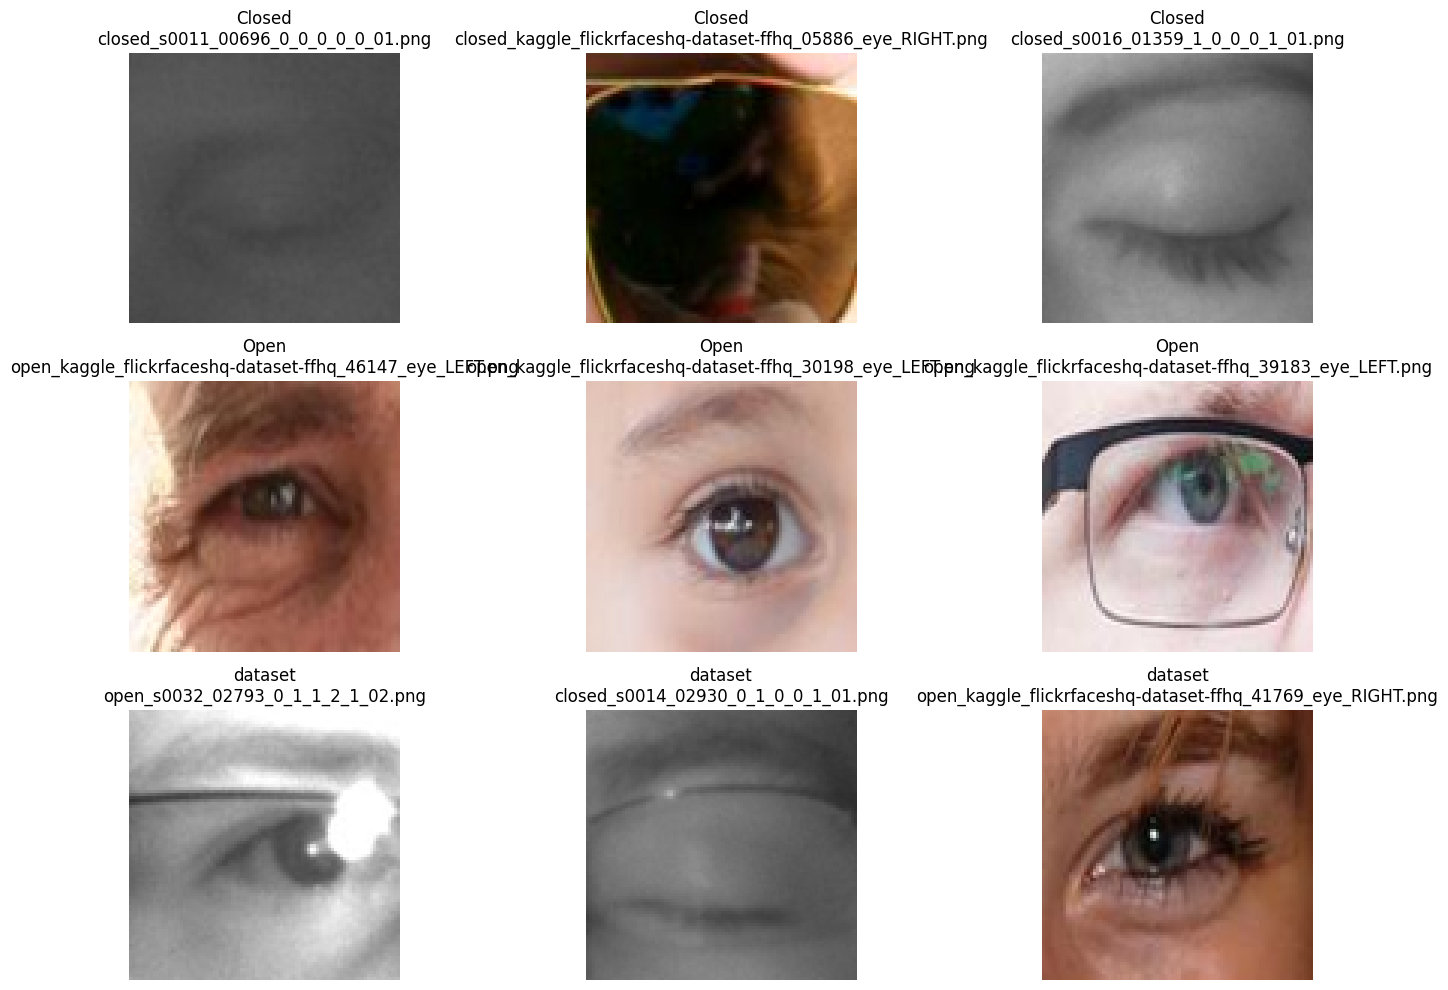

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2 # OpenCV for image loading
import random

# Image extensions to consider
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')

# Directories to visualize, as specified by the user
target_directories = [
    '/content/train/Closed',
    '/content/train/Open',
    '/content/train/dataset'
]

num_samples_per_dir = 3  # Number of images to display from each directory

plt.figure(figsize=(15, 10))

for i, directory in enumerate(target_directories):
    if os.path.isdir(directory):
        image_files = [f for f in os.listdir(directory) if f.lower().endswith(image_extensions)]

        if not image_files:
            print(f"No image files found in '{directory}'.")
            continue

        # Select a few random images
        samples_to_display = random.sample(image_files, min(len(image_files), num_samples_per_dir))

        for j, image_name in enumerate(samples_to_display):
            image_path = os.path.join(directory, image_name)
            try:
                img = cv2.imread(image_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB for matplotlib
                    ax = plt.subplot(len(target_directories), num_samples_per_dir, i * num_samples_per_dir + j + 1)
                    plt.imshow(img)
                    plt.title(f"{os.path.basename(directory)}\n{image_name}")
                    plt.axis('off')
                else:
                    print(f"Could not load image: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
    else:
        print(f"Directory '{directory}' does not exist or is not a directory.")

plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
from PIL import Image
from torch.utils.data import Dataset
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
import glob
from sklearn.model_selection import train_test_split

In [ ]:
BATCH_SIZE = 128
NUM_WORKERS = 2
NUM_EPOCHS = 15
LEARNING_RATE = 1e-4

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda:0


In [ ]:

IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((145, 145)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD)
])

val_transform = transforms.Compose([
    transforms.Resize((145, 145)),
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD)
])

In [ ]:
class OpenClosedEyeSet(Dataset):

    def __init__(self,images_list,mode='train',transform=None) -> None:
        self.images_list=images_list
        self.mode=mode
        self.transform=transform

    def __len__(self):
        return len(self.images_list)

    def __getitem__(self, index):
        image_path, label = self.images_list[index]
        image=Image.open(image_path).convert('RGB')

        if self.transform:
            transformed_image = self.transform(image)
        else:
             transformed_image = transforms.ToTensor()(image)

        return transformed_image, torch.tensor(label, dtype=torch.long)

In [ ]:
DATA_ROOT = '/content/train/dataset'

all_image_data = []


if os.path.isdir(DATA_ROOT):
    for filename in os.listdir(DATA_ROOT):
        if filename.lower().endswith(image_extensions):
            full_path = os.path.join(DATA_ROOT, filename)

            label = -1
            if filename.lower().startswith('closed_'):
                label = 0 # 0 for Closed
            elif filename.lower().startswith('open_'):
                label = 1 # 1 for Open

            if label != -1:
                all_image_data.append((full_path, label))

else:
    print(f"Error: Directory '{DATA_ROOT}' not found.")

data_tuples = all_image_data

print(f"Total images loaded: {len(data_tuples)}")

#splitting data
train_list, test_val_list = train_test_split(data_tuples, test_size=0.2, random_state=42)
val_list, test_list = train_test_split(test_val_list, test_size=0.5, random_state=42)

print(f"Train samples: {len(train_list)}, Validation samples: {len(val_list)} , Test samples: {len(test_list)}")

# dataset object
train_dataset = OpenClosedEyeSet(train_list, mode='train', transform=train_transform)
val_dataset = OpenClosedEyeSet(val_list, mode='val', transform=val_transform)

#   DataLoader object
train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

Total images loaded: 27961
Train samples: 22368, Validation samples: 2796 , Test samples: 2797


In [ ]:

class DrowsinessCNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64), #  Batch Norm
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # (72x72x64)

            # Block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128), # Batch Norm
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # (36x36x128)

            # Block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256), #  Batch Norm
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), # (18x18x256)

            # Block 4
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512), #  Batch Norm
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
            # 9x9x512
        )

        final_conv_size = 9 * 9 * 512

        self.dense = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(in_features=final_conv_size, out_features=128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=128, out_features=1),
        )

    def forward(self, x):
        output = self.input(x)
        output = output.view(output.size(0), -1)
        output = self.dense(output)
        return output

In [ ]:

model = DrowsinessCNN()
model.to(device)

DrowsinessCNN(
  (input): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [ ]:

optimizer = torch.optim.AdamW(params=model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()

In [ ]:
import time
from tqdm import tqdm
import os

scaler = torch.cuda.amp.GradScaler()
train_losses = []
val_losses = []
val_accuracies = []
train_accuracies = [] # Initialize train_accuracies list

best_val_loss = float('inf')
patience_counter = 0
PATIENCE = 5

# Create the directory to save the model if it doesn't exist
os.makedirs('./saved_model', exist_ok=True)

for epoch in range(NUM_EPOCHS):
    start_time = time.time()

    # ------------------ (TRAIN) ------------------
    model.train()
    running_loss = 0
    correct_train_predictions = 0
    total_train_samples = 0

    for images, labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1} Train"):
        images = images.to(device)
        labels = labels.to(device).float().unsqueeze(1)

        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)

        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * images.size(0)

        # Calculate training accuracy
        preds = (torch.sigmoid(outputs) >= 0.5).long()
        labels_long = labels.long()
        correct_train_predictions += (preds == labels_long).sum().item()
        total_train_samples += images.size(0)

    epoch_train_loss = running_loss / len(train_dataloader.dataset)
    epoch_train_acc = (correct_train_predictions / total_train_samples) * 100
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc) # Append training accuracy

    # ------------------  (VALIDATION) ------------------
    model.eval()
    running_val_loss = 0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for images, labels in tqdm(val_dataloader, desc=f"Epoch {epoch+1} Val"):
            images = images.to(device)
            labels = labels.to(device).float().unsqueeze(1)

            outputs = model(images)
            val_loss = criterion(outputs, labels)
            running_val_loss += val_loss.item() * images.size(0)

            preds = (torch.sigmoid(outputs) >= 0.5).long()
            labels_long = labels.long()
            correct_predictions += (preds == labels_long).sum().item()
            total_samples += images.size(0)

    epoch_val_loss = running_val_loss / len(val_dataloader.dataset)
    epoch_val_acc = (correct_predictions / total_samples) * 100
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    end_time = time.time()
    epoch_duration = end_time - start_time

    print(f"[Epoch: {epoch+1}/{NUM_EPOCHS}], [Duration: {epoch_duration:.2f}s], "
          f"[Train Loss: {epoch_train_loss:.4f}], [Val Loss: {epoch_val_loss:.4f}], "
          f"[Train Acc: {epoch_train_acc:.2f}%], [Val Acc: {epoch_val_acc:.2f}%]") # Added Train Acc to print

    #  (Early Stopping)
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), './saved_model/open_cloded_eye_detector.pth')   # save best model
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print(f"Early stopping triggered after {PATIENCE} epochs without improvement.")
            break

print("Training finished.")

/tmp/ipython-input-4144342219.py:5: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
Epoch 1 Train:   0%|          | 0/175 [00:00<?, ?it/s]/tmp/ipython-input-4144342219.py:31: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 1 Val: 100%|██████████| 22/22 [00:05<00:00,  4.17it/s]


[Epoch: 1/15], [Duration: 57.27s], [Train Loss: 0.0509], [Val Loss: 0.0538], [Train Acc: 98.41%], [Val Acc: 98.50%]


Epoch 2 Val: 100%|██████████| 22/22 [00:04<00:00,  4.99it/s]


[Epoch: 2/15], [Duration: 48.62s], [Train Loss: 0.0501], [Val Loss: 0.0445], [Train Acc: 98.48%], [Val Acc: 98.82%]


Epoch 3 Val: 100%|██████████| 22/22 [00:04<00:00,  5.10it/s]


[Epoch: 3/15], [Duration: 49.40s], [Train Loss: 0.0493], [Val Loss: 0.0460], [Train Acc: 98.48%], [Val Acc: 98.50%]


Epoch 4 Val: 100%|██████████| 22/22 [00:05<00:00,  3.97it/s]


[Epoch: 4/15], [Duration: 49.16s], [Train Loss: 0.0475], [Val Loss: 0.0435], [Train Acc: 98.54%], [Val Acc: 98.61%]


Epoch 5 Val: 100%|██████████| 22/22 [00:04<00:00,  5.10it/s]


[Epoch: 5/15], [Duration: 47.55s], [Train Loss: 0.0477], [Val Loss: 0.0364], [Train Acc: 98.49%], [Val Acc: 98.68%]


Epoch 6 Val: 100%|██████████| 22/22 [00:04<00:00,  4.98it/s]


[Epoch: 6/15], [Duration: 50.44s], [Train Loss: 0.0424], [Val Loss: 0.0513], [Train Acc: 98.65%], [Val Acc: 98.50%]


Epoch 7 Val: 100%|██████████| 22/22 [00:04<00:00,  4.63it/s]


[Epoch: 7/15], [Duration: 50.22s], [Train Loss: 0.0447], [Val Loss: 0.0348], [Train Acc: 98.63%], [Val Acc: 98.75%]


Epoch 8 Val: 100%|██████████| 22/22 [00:05<00:00,  3.90it/s]


[Epoch: 8/15], [Duration: 50.85s], [Train Loss: 0.0413], [Val Loss: 0.0392], [Train Acc: 98.76%], [Val Acc: 98.68%]


Epoch 9 Val: 100%|██████████| 22/22 [00:04<00:00,  4.63it/s]


[Epoch: 9/15], [Duration: 58.23s], [Train Loss: 0.0428], [Val Loss: 0.0401], [Train Acc: 98.68%], [Val Acc: 98.68%]


Epoch 10 Val: 100%|██████████| 22/22 [00:04<00:00,  4.73it/s]


[Epoch: 10/15], [Duration: 65.64s], [Train Loss: 0.0412], [Val Loss: 0.0455], [Train Acc: 98.69%], [Val Acc: 98.57%]


Epoch 11 Val: 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]


[Epoch: 11/15], [Duration: 51.46s], [Train Loss: 0.0393], [Val Loss: 0.0369], [Train Acc: 98.77%], [Val Acc: 98.78%]


Epoch 12 Val: 100%|██████████| 22/22 [00:05<00:00,  4.31it/s]

[Epoch: 12/15], [Duration: 50.75s], [Train Loss: 0.0390], [Val Loss: 0.0411], [Train Acc: 98.85%], [Val Acc: 98.93%]
Early stopping triggered after 5 epochs without improvement.
Training finished.


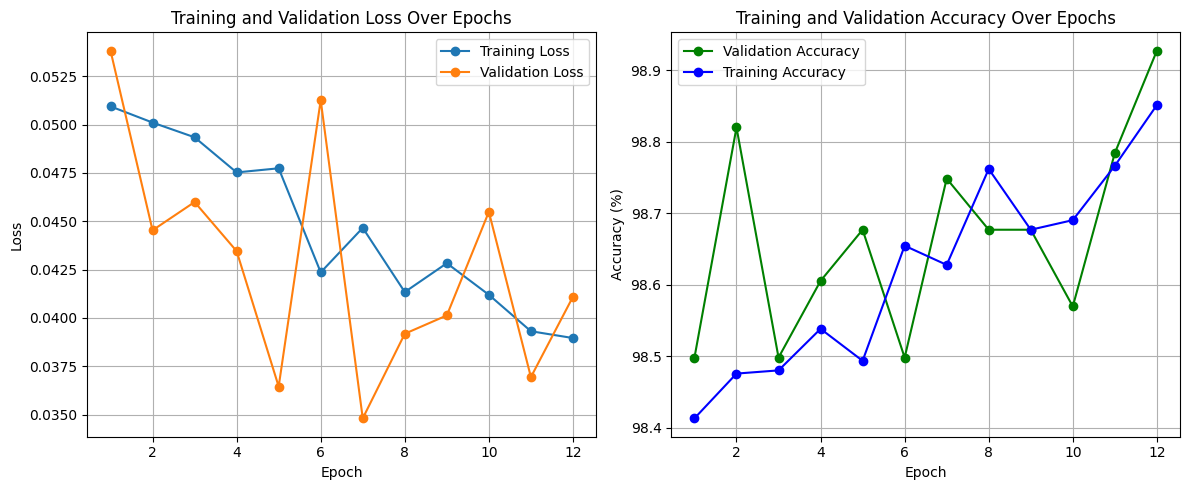

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)


plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o', color='green')
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o', color='blue')


plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Create Test Dataset and DataLoader
test_dataset = OpenClosedEyeSet(test_list, mode='test', transform=val_transform)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
    pin_memory=True
)

# Load the best model (saved during early stopping)
model.load_state_dict(torch.load('./saved_model/open_cloded_eye_detector.pth'))
model.eval() # Set the model to evaluation mode

all_preds = []
all_labels = []

print("Generating predictions on the test set...")
with torch.no_grad():
    for images, labels in tqdm(test_dataloader, desc="Testing"): # Corrected tqdm desc
        images = images.to(device)

        # Ensure labels are of correct type for BCEWithLogitsLoss output (float)
        labels = labels.to(device)

        outputs = model(images)
        preds = (torch.sigmoid(outputs) >= 0.5).long() # Convert probabilities to binary predictions

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

print("\nConfusion Matrix:")
print(cm)

# You can also print a more detailed report
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Closed', 'Open']))

Generating predictions on the test set...


Testing: 100%|██████████| 22/22 [00:04<00:00,  4.85it/s]


Confusion Matrix:
[[ 602   23]
 [   6 2166]]

Classification Report:
              precision    recall  f1-score   support

      Closed       0.99      0.96      0.98       625
        Open       0.99      1.00      0.99      2172

    accuracy                           0.99      2797
   macro avg       0.99      0.98      0.98      2797
weighted avg       0.99      0.99      0.99      2797



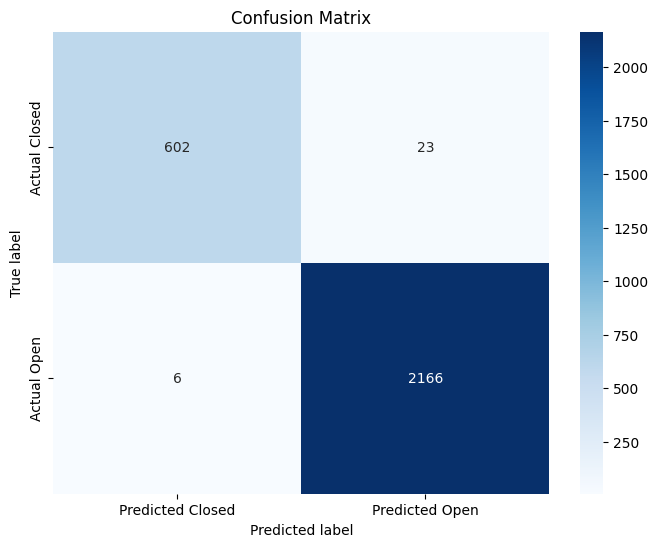

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure cm is available. If not, re-run the previous cell or define it here for testing.
# cm = np.array([[613, 12], [30, 2142]]) # Example if cm was not in kernel state

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted Closed', 'Predicted Open'],
            yticklabels=['Actual Closed', 'Actual Open'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Please upload an image of an eye (JPG, PNG, etc.):


Saving 17566674-close-up-portrait-of-young-woman-s-eye-zone-make-up-with-eye-shut.jpg to 17566674-close-up-portrait-of-young-woman-s-eye-zone-make-up-with-eye-shut.jpg
Uploaded file: 17566674-close-up-portrait-of-young-woman-s-eye-zone-make-up-with-eye-shut.jpg


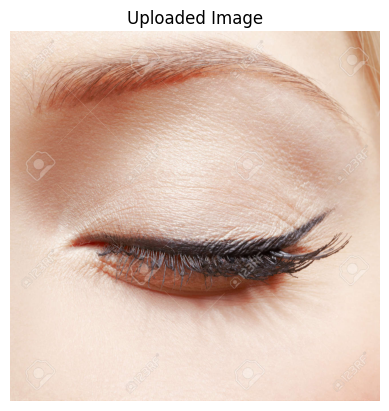


Prediction for the uploaded image (17566674-close-up-portrait-of-young-woman-s-eye-zone-make-up-with-eye-shut.jpg): Closed
Do you want to upload another image? (yes/no): yes
Please upload an image of an eye (JPG, PNG, etc.):


Saving dataset-cover.jpg to dataset-cover.jpg
Uploaded file: dataset-cover.jpg


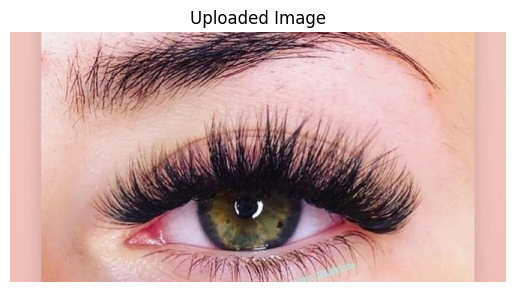


Prediction for the uploaded image (dataset-cover.jpg): Open
Do you want to upload another image? (yes/no): no
Exiting image upload process.


In [ ]:
from google.colab import files
import os
from PIL import Image
import matplotlib.pyplot as plt

while True:
    print("Please upload an image of an eye (JPG, PNG, etc.):")

    uploaded = files.upload()

    if uploaded:
        # Get the filename of the uploaded image
        filename = next(iter(uploaded))
        print(f"Uploaded file: {filename}")

        # Save the uploaded file
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

        # Display the uploaded image
        try:
            img = Image.open(filename)
            plt.imshow(img)
            plt.title("Uploaded Image")
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Could not display image: {e}")

        # Make prediction using the defined function
        prediction = predict_eye_status(filename, model, val_transform, device)
        print(f"\nPrediction for the uploaded image ({filename}): {prediction}")

        # Clean up the uploaded file
        os.remove(filename)

        # Ask user if they want to continue
        choice = input("Do you want to upload another image? (yes/no): ").lower()
        if choice != 'yes':
            print("Exiting image upload process.")
            break
    else:
        print("No file was uploaded. Exiting image upload process.")
        break
